# Assesment 1

Dataset:

https://github.com/TopsCode/Data_Analysis_2024/blob/main/ALL_CSV/banklist.
csv

1) Import pandas and read in the banklist.csv file into a dataframe called
banks.

In [4]:
import pandas as pd
banks = pd.read_csv('/content/banklist.csv')

2) Show the head of the dataframe.

In [5]:
# Show the first 5 rows of the dataframe
banks.head()


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


3) What are the column names?

In [6]:
# Get the column names
banks.columns


Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

4) How many States (ST) are represented in this data set?

In [7]:
# Getting the number of unique states
num_states = banks['ST'].nunique()
num_states


44

5) Get a list or array of all the states in the data set.

In [8]:
states = banks['ST'].unique()
states


array(['IL', 'WI', 'LA', 'UT', 'NJ', 'AR', 'GA', 'PA', 'TN', 'WA', 'CO',
       'PR', 'FL', 'MN', 'CA', 'MD', 'OK', 'OH', 'SC', 'VA', 'ID', 'TX',
       'CT', 'AZ', 'NV', 'NC', 'KY', 'MO', 'KS', 'AL', 'MI', 'IN', 'IA',
       'NE', 'MS', 'NM', 'OR', 'NY', 'MA', 'SD', 'WY', 'WV', 'NH', 'HI'],
      dtype=object)

6) What are the top 5 states with the most failed banks?

In [10]:
top_5_states = banks['ST'].value_counts().head(5)
top_5_states


,count
ST,
GA,93
FL,75
IL,68
CA,41
MN,23


7) What are the top 5 acquiring institutions?

In [12]:
top_5_acquirers = banks['Acquiring Institution'].value_counts().head(5)
top_5_acquirers

,count
Acquiring Institution,
No Acquirer,31
State Bank and Trust Company,12
First-Citizens Bank & Trust Company,11
Ameris Bank,10
U.S. Bank N.A.,9


8) How many banks has the State Bank of Texas acquired? How many of
them were actually in Texas?

In [13]:
# Number of banks acquired by the State Bank of Texas
num_acquired_by_sbt = banks[banks['Acquiring Institution'] == 'State Bank of Texas'].shape[0]

# Number of banks acquired by the State Bank of Texas in Texas
num_acquired_in_texas = banks[(banks['Acquiring Institution'] == 'State Bank of Texas') & (banks['ST'] == 'TX')].shape[0]

num_acquired_by_sbt, num_acquired_in_texas


(3, 1)

9) What is the most common city in California for a bank to fail in?

In [14]:
# Get the most common city in California for a bank to fail
most_common_city_in_ca = banks[banks['ST'] == 'CA']['City'].value_counts().idxmax()
most_common_city_in_ca


'Los Angeles'

# Assesment 2

Dataset:

https://github.com/TopsCode/Data_Analysis_2024/blob/main/ALL_CSV/historical_autom
obile_sales.csv

Q 1: Develop a Line chart using the functionality of pandas to show how
automobile sales fluctuate from year to year.

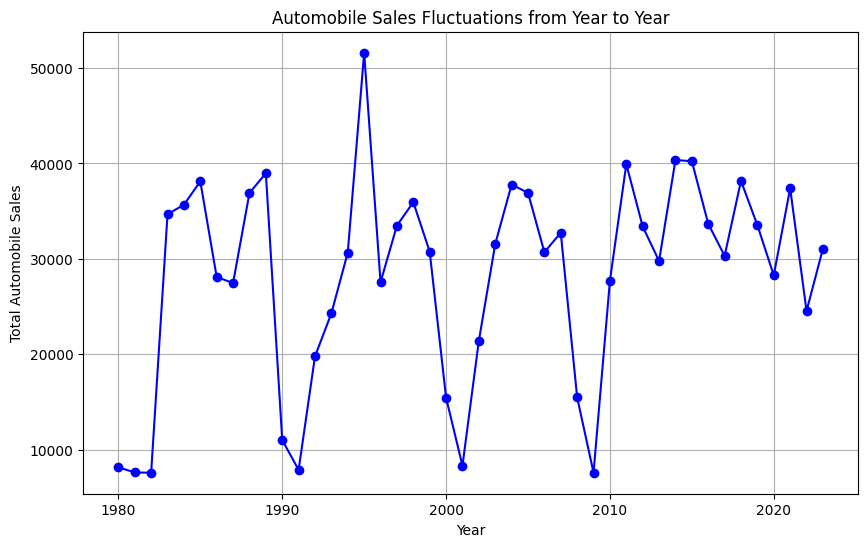

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/historical_automobile_sales.csv')

# Group by Year and calculate total sales for each year
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()

# Plot the line chart
plt.figure(figsize=(10,6))
yearly_sales.plot(kind='line', marker='o', color='b')
plt.title('Automobile Sales Fluctuations from Year to Year')
plt.xlabel('Year')
plt.ylabel('Total Automobile Sales')
plt.grid(True)
plt.show()


Q 2: Plot different lines for categories of vehicle type and analyze the trend
to answer the question Is there a noticeable difference in sales trends
between different vehicle types during recession periods?

<Figure size 1000x600 with 0 Axes>

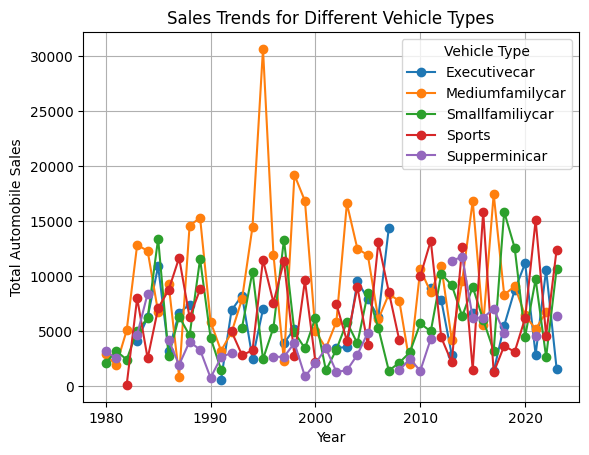

In [16]:
# Group by Year and Vehicle_Type to calculate total sales for each category per year
sales_by_type = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plotting line chart for each vehicle type
plt.figure(figsize=(10,6))
sales_by_type.plot(kind='line', marker='o')
plt.title('Sales Trends for Different Vehicle Types')
plt.xlabel('Year')
plt.ylabel('Total Automobile Sales')
plt.grid(True)
plt.legend(title='Vehicle Type')
plt.show()
